# Image Processing

## Initialization

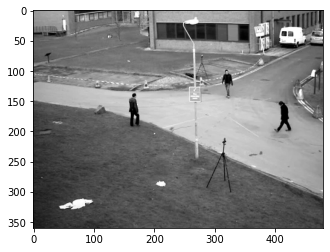

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('vtest-f1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

## Thresholding

### Binary Thresholding

$$ dst(x,y) = \begin{cases} 
    maxval & \text{if src(x,y)> thresh} \\
    minval & \text{otherwise} 
\end{cases} $$

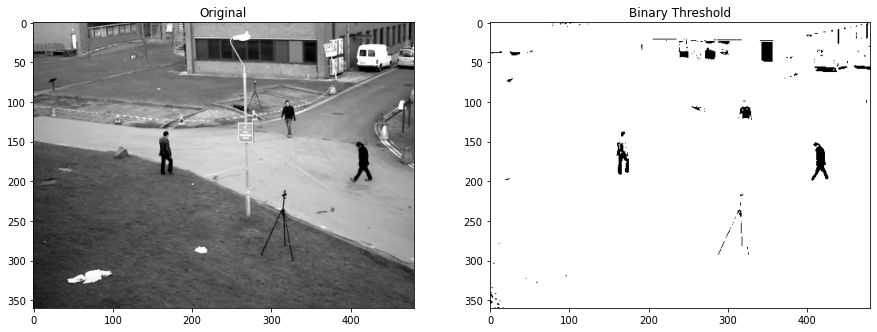

In [22]:
binary_thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_val = 25
MAX_VAL = 255
MIN_VAL = 0
binary_thresh[binary_thresh>thresh_val] = MAX_VAL
binary_thresh[binary_thresh<=thresh_val] = MIN_VAL

fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(binary_thresh, cmap="gray")
ax[1].set_title('Binary Threshold')
plt.show()

### Inverse Binary Thresholding

$$ dst(x,y) = \begin{cases} 
    minval & \text{if src(x,y)> thresh} \\
    maxval & \text{otherwise} 
\end{cases} $$

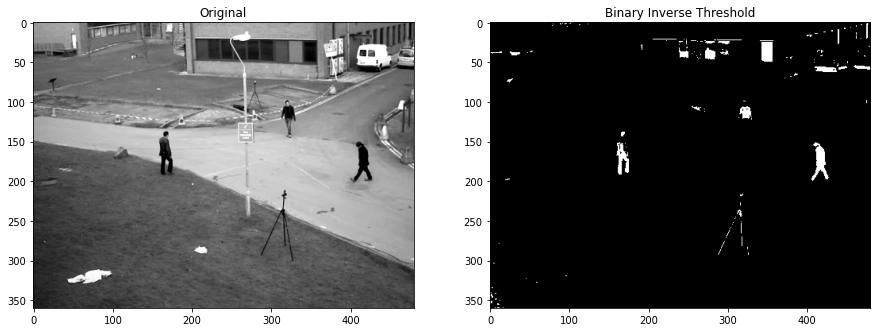

In [23]:
binaryinv_thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_val = 25
MAX_VAL = 255
MIN_VAL = 0

# Create boolean array (mask) to point the pixel location
mask_gt = binaryinv_thresh<=thresh_val
mask_lte = binaryinv_thresh>thresh_val

# Apply mask to replace the value
binaryinv_thresh[mask_gt] = MAX_VAL
binaryinv_thresh[mask_lte] = MIN_VAL

fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(binaryinv_thresh, cmap="gray")
ax[1].set_title('Binary Inverse Threshold')
plt.imshow(binaryinv_thresh, cmap="gray")
plt.show()

## Truncate Thresholding

$$ dst(x,y) = \begin{cases} 
    threshold & \text{if src(x,y) > thresh} \\
    src(x,y) & \text{otherwise} 
\end{cases} $$

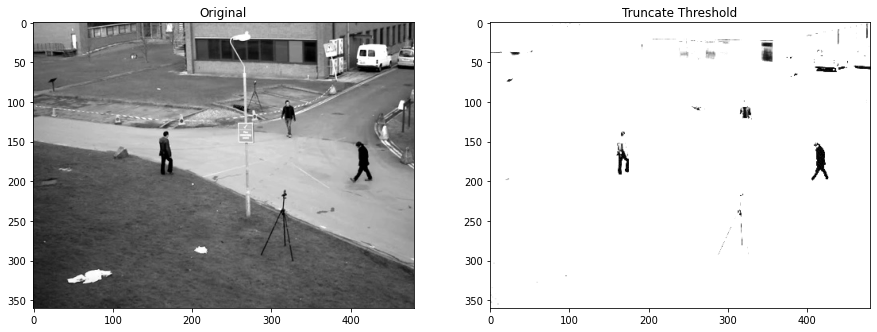

In [24]:
trunc_thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_val = 25
MAX_VAL = 255
MIN_VAL = 0
trunc_thresh[trunc_thresh>thresh_val] = thresh_val

fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(trunc_thresh, cmap="gray")
ax[1].set_title('Truncate Threshold')
plt.show()

## To Zero Thresholding

$$ dst(x,y) = \begin{cases} 
    0 & \text{if src(x,y) > thresh} \\
    src(x,y) & \text{otherwise} 
\end{cases} $$

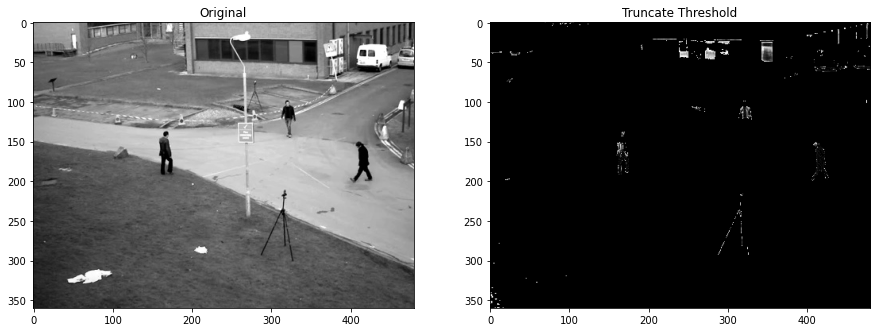

In [28]:
tozero_thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_val = 25
MAX_VAL = 255
MIN_VAL = 0
tozero_thresh[tozero_thresh>thresh_val] = 0

fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(tozero_thresh, cmap="gray")
ax[1].set_title('Truncate Threshold')
plt.show()

## To Zero Inverse Thresholding

$$ dst(x,y) = \begin{cases} 
    0 & \text{if src(x,y) > thresh} \\
    src(x,y) & \text{otherwise} 
\end{cases} $$

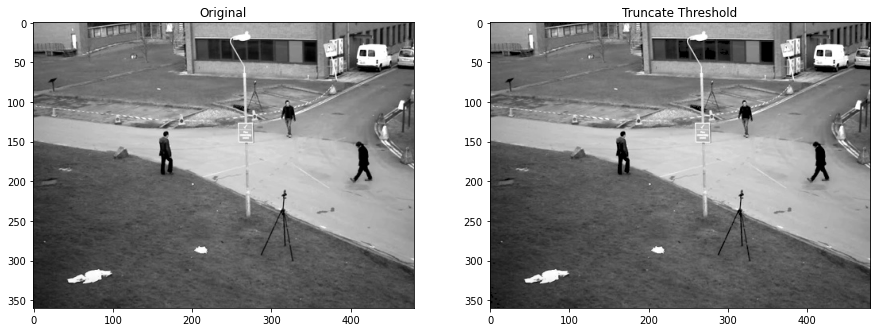

In [30]:
tozeroinv_thresh = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_val = 25
MAX_VAL = 255
MIN_VAL = 0
tozeroinv_thresh[tozeroinv_thresh<=thresh_val] = 0

fig, ax = plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(tozeroinv_thresh, cmap="gray")
ax[1].set_title('Truncate Threshold')
plt.show()

### Otsu Thresholding

$$ \sigma^{2}_{b}(t) = w_{bg}\sigma_{bg}^{2}(t)+w_{fg}\sigma_{fg}^{2}(t)$$

$$ \sigma^{2}_{b} (t) = w_{1}(t)w_{2}(t) [\mu_{1}(t)-\mu_{2}(t)]^{2}$$

Bobot didapatkan dengan cara:
- $ w_{bg}(t)= \frac{P_{bg}(t)}{P_{all}}, $
- $ w_{fg}(t)= \frac{P_{fg}(t)}{P_{all}}, $

dimana:
- $P_{all}$ adalah jumlah pixel,
- $P_{bg}(t)$ adalah jumlah pixel pada background pada threshold t,
- $P_{fg}(t)$ adalah jumlah pixel pada foreground pada threshold t,


Variance didapatkan dengan cara:
- $\sigma^{2}(t) = \frac{\sum (x_{i}-\overline{x})^{2}}{N-1}$

,dimana:
- $x_{i}$ merupakan nilai intensitas pada pixel ke-i pada group (bg atau fg)
- $\overline(x)$ merupakan nilai rata-rata pada group (bg atau fg)
- $N$ merupakan jumlah pixel

Probabilitas didapatkan dengan persamaan berikut:

$$P(i) = \frac{n_{i}}{n}$$

## Morphology

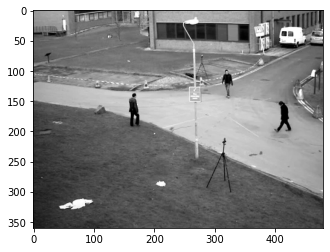

array([[[  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0],
        [  0, 105, 143, 178,   0],
        [  0, 106, 144, 179,   0],
        ...,
        [  0,  68,  82, 101,   0],
        [  0,  56,  66,  83,   0],
        [  0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0],
        [  0, 105, 143, 178,   0],
        [  0, 105, 143, 178,   0],
        ...,
        [  0,  66,  79, 101,   0],
        [  0,  60,  70,  88,   0],
        [  0,   0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0,   0],
        [  0,   0,  36,  20,   0],
        [  0,   0,  36,  20,   0],
        ...,
        [  0,  10,  72,  60,   0],
        [  0,   9,  71,  59,   0],
        [  0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0],
        [  0,   0,  35,  19,   0],
        [  0,   1

In [24]:
img = cv2.imread('vtest-f1.jpg')
img_shape = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()
img = np.pad(img, 1,'constant', constant_values=(0))
img

### Dilation

In [9]:
kernel = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0],
])
kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [ ]:
y_least = img_shape[0]-1
x_least = img_shape[1]-1
for y in range(1, y_least):
    for x in range(1, x_least):
        
        

In [19]:
np.pad(img,1,'constant',constant_values=(0))

array([[[  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0],
        [  0, 105, 143, 178,   0],
        [  0, 106, 144, 179,   0],
        ...,
        [  0,  68,  82, 101,   0],
        [  0,  56,  66,  83,   0],
        [  0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0],
        [  0, 105, 143, 178,   0],
        [  0, 105, 143, 178,   0],
        ...,
        [  0,  66,  79, 101,   0],
        [  0,  60,  70,  88,   0],
        [  0,   0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0,   0],
        [  0,   0,  36,  20,   0],
        [  0,   0,  36,  20,   0],
        ...,
        [  0,  10,  72,  60,   0],
        [  0,   9,  71,  59,   0],
        [  0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0],
        [  0,   0,  35,  19,   0],
        [  0,   1